D:\ANACONDA3\lib\site-packages\ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in true_divide


10.629848594087958

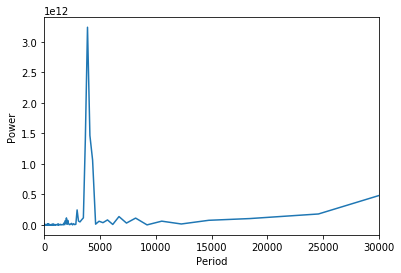

In [177]:
#导包
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame
import numpy as np
from scipy import fftpack


#way one
#读取数据
df = pd.read_csv(r'sunspot_data.csv',sep=',',header='infer',usecols=[1,3,5])
n = df.shape[0]
df_sun = df['Number of Sunspots']


#ft变换
Y = fftpack.fft(df_sun, axis=0)
frequencies = fftpack.fftfreq(n,1)
power = np.abs(Y)**2
periods = 1 / frequencies 
plt.plot(periods,power)
plt.xlim(0,30000)
plt.xlabel('Period')
plt.ylabel('Power')
pos_sun = np.where(frequencies > 0)  #where条件
freqs = periods[pos_sun]
peak_freq = freqs[power[pos_sun].argmax()]
T = peak_freq/365
T
#出现误差可能是由于一年可为366或365天

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73718 entries, 0 to 73717
Data columns (total 3 columns):
Year                  73718 non-null int64
Day                   73718 non-null int64
Number of Sunspots    73718 non-null int64
dtypes: int64(3)
memory usage: 1.7 MB


D:\ANACONDA3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


10.631578947368421

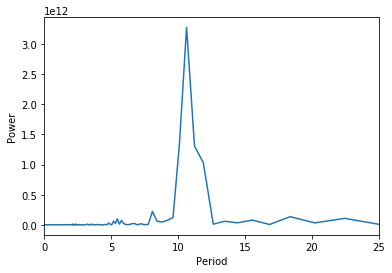

In [176]:
#way two
#数据清洗
df = pd.read_csv(r'sunspot_data.csv',sep=',',header='infer',usecols=[1,3,5])
df.info()
df.loc[df.loc[df['Number of Sunspots']==-1].index,'Number of Sunspots'] = 0
data = df.groupby(by='Year')['Number of Sunspots'].sum()
n= np.size(data)

#ft变换
Y = fftpack.fft(data, axis=0)
frequencies = fftpack.fftfreq(n,1)
power = np.abs(Y)**2
periods = 1 / frequencies 
plt.plot(periods,power)
plt.xlim(0,25)
plt.xlabel('Period')
plt.ylabel('Power')
pos_sun = np.where(frequencies > 0)  #where条件
freqs = periods[pos_sun]
t = freqs[power[pos_sun].argmax()]
t

- 方波

1.0 267.66666666666663


D:\ANACONDA3\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


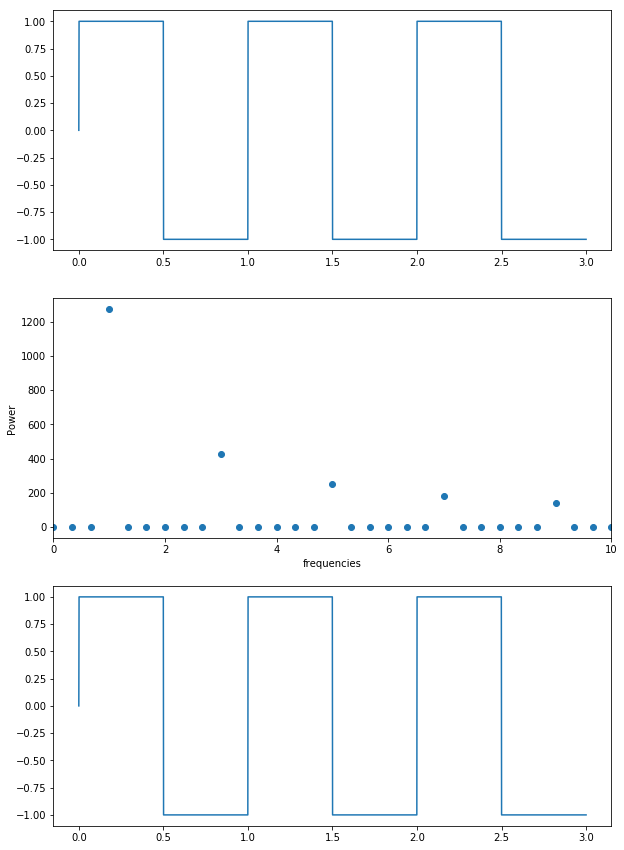

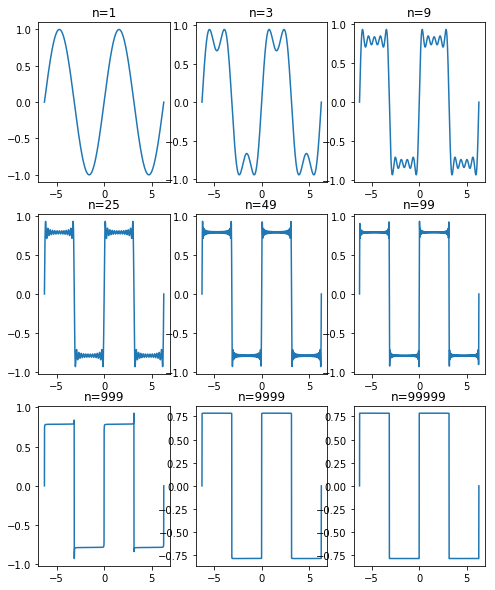

In [296]:
#构造方波
plt.figure(figsize=(10,15))
n_samples = 2000
time = np.linspace(0,3, n_samples)
s2 = np.sign(np.sin(2*np.pi * time))
plt.subplot(311)
plt.plot(time,s2)

#ft变换
Y = fftpack.fft(s2, axis=0)
frequencies = fftpack.fftfreq(len(s2),3/2000)
power = np.abs(Y)
plt.subplot(312)
plt.plot(frequencies,power,'o')
plt.xlim(0,10)
plt.xlabel('frequencies')
plt.ylabel('Power')
pos_sun = np.where(frequencies > 0)  #where条件
freqs = frequencies[pos_sun]
wmax = freqs[power[pos_sun].argmax()]
print(wmax,wmin)

#ifft变换
Y = fftpack.ifft(Y, axis=0)
plt.subplot(313)
plt.plot(time,Y)

#
time = np.linspace(-2*np.pi,2*np.pi,1000)
n = [1,3,9,25,49,99,999,9999,99999]
plt.figure(figsize=(8,10))
for i in range(len(n)):
    y = 0
    for j in range(1,n[i]+1,2):
        y += np.sin(j*time)/j
    plt.subplot(331+i)
    plt.plot(time,y)
    plt.title(f'n={n[i]}')








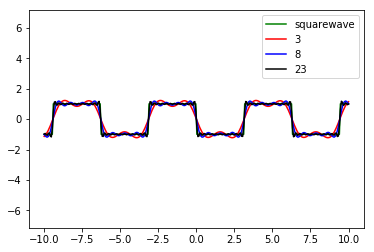

In [306]:
#构造方波
x = np.linspace(-10,10,300)
y=[]
for i in x:
    if np.sin(i)>0:#调用sin，cos要使用np.sin，np.cos
        y.append(-1)
    else:
        y.append(1)
y=np.array(y)#需要把list转化成array，方便进行矩阵的运算


def fourier(x,y,n):
    x1=[]#（sin(nx),con(nx)）
    for i in range(n):
        x1.append(np.sin(x*i+x))
        x1.append(np.cos(x*i+x))
    m=np.mat(x1).T     #使用np.mat方便矩阵的连乘
    y.shape=(y.shape[0],1)
    p=m*np.linalg.inv(m.T*m)*m.T*y #矩阵求逆
    ym=np.array(p)#将矩阵转换成array，与前面统一
    ym = ym.reshape((np.size(ym),))
#     ym.shape=(ym.shape[0],)
    return ym
plt.plot(x,y,color="g",label='squarewave')
plt.plot(x,fourier(x,y,3),color='r',label='3')
plt.plot(x,fourier(x,y,8),color='b',label='8')
plt.plot(x,fourier(x,y,23),color='k',label='23')
plt.legend()
plt.axis('equal')
plt.show()